In [1]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import ceil, floor, sqrt
import glog as log
np.log10([1,10])

array([0., 1.])

In [4]:
data = np.random.random_integers(0,6,30)
print(data)
a = pd.Series(data);
print(a)
b = a.value_counts()
print(b)
y = []
for i in list(b.index):
    y.append(b[i])
x = list(b.index)
ind = np.lexsort((x,y))
[(x[i],y[i]) for i in ind] 

W0325 13:15:26.352391 14086 warnings.py:109] <ipython-input-4-bacabdee4cfe>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 6 + 1) instead
  data = np.random.random_integers(0,6,30)



[0 2 6 6 5 5 6 0 3 5 6 0 2 3 2 1 6 6 2 0 0 0 3 0 5 4 6 5 3 6]
0     0
1     2
2     6
3     6
4     5
5     5
6     6
7     0
8     3
9     5
10    6
11    0
12    2
13    3
14    2
15    1
16    6
17    6
18    2
19    0
20    0
21    0
22    3
23    0
24    5
25    4
26    6
27    5
28    3
29    6
dtype: int64
6    8
0    7
5    5
3    4
2    4
4    1
1    1
dtype: int64


[(1, 1), (4, 1), (2, 4), (3, 4), (5, 5), (0, 7), (6, 8)]

In [23]:
def load(f):
    for i in f:
        return i

def get_nnz(f):
    row_offset = load(f)
    ans = []
    for i in range(1,len(row_offset)):
        ans.append(int(row_offset[i])-int(row_offset[i-1]))
    log.info(len(ans))
    return ans;
def get_xy(r):
    a = pd.Series(r)
    b = a.value_counts()
    yy = [] # Frequency
    for i in list(b.index):
        yy.append(b[i])
    yy = np.array(yy)
    yy = yy/yy.sum()  # Percentile
    xx = b.index      # NNZs
    ind = np.lexsort((yy,xx))
    x = [0]
    y = [0]
    
    for i in ind:
        x.append(xx[i])
        y.append(yy[i]+y[-1])
    return min(x),max(x),x,y

f = open('cora.csv','r')
f1 = csv.reader(f)
cora = get_nnz(f1)
f.close()

f = open('polblogs.csv','r')
f2 = csv.reader(f)
polblogs = get_nnz(f2)
f.close()

f = open('citeseer.csv','r')
f3 = csv.reader(f)
citeseer = get_nnz(f3)
f.close()

f = open('pubmed.csv','r')
f4 = csv.reader(f)
pubmed = get_nnz(f4)
f.close()

f = open('ppi.csv','r')
f5 = csv.reader(f)
ppi = get_nnz(f5)
f.close()

f = open('flickr.csv','r')
f6 = csv.reader(f)
flickr = get_nnz(f6)
f.close()

f = open('reddit.csv','r')
f7 = csv.reader(f)
reddit = get_nnz(f7)
f.close()

f = open('yelp.csv','r')
f8 = csv.reader(f)
yelp = get_nnz(f8)
f.close()

f = open('amazon.csv','r')
f9 = csv.reader(f)
amazon = get_nnz(f9)
f.close()


I0325 13:55:06.943341 14086 <ipython-input-23-fa3520fef125>:10] 2485
I0325 13:55:06.945745 14086 <ipython-input-23-fa3520fef125>:10] 1222
I0325 13:55:06.947772 14086 <ipython-input-23-fa3520fef125>:10] 2110
I0325 13:55:06.959666 14086 <ipython-input-23-fa3520fef125>:10] 19717
I0325 13:55:06.969133 14086 <ipython-input-23-fa3520fef125>:10] 14755
I0325 13:55:07.025262 14086 <ipython-input-23-fa3520fef125>:10] 89250
I0325 13:55:07.158169 14086 <ipython-input-23-fa3520fef125>:10] 232965
I0325 13:55:07.560347 14086 <ipython-input-23-fa3520fef125>:10] 716847
I0325 13:55:08.467313 14086 <ipython-input-23-fa3520fef125>:10] 1569960


0
169
0
0


W0325 14:08:35.206638 14086 warnings.py:109] <ipython-input-37-b0bbbd96c211>:23: RuntimeWarning: divide by zero encountered in log10
  plt.step(cora_y, np.log10(cora_x), label='cora')

I0325 14:08:35.220530 14086 <ipython-input-37-b0bbbd96c211>:24] 0
I0325 14:08:35.221013 14086 <ipython-input-37-b0bbbd96c211>:25] []
W0325 14:08:35.221602 14086 warnings.py:109] <ipython-input-37-b0bbbd96c211>:27: RuntimeWarning: divide by zero encountered in log10
  plt.step(polblogs_y, np.log10(polblogs_x), label='polblogs')

I0325 14:08:35.222667 14086 <ipython-input-37-b0bbbd96c211>:28] 0
I0325 14:08:35.223139 14086 <ipython-input-37-b0bbbd96c211>:29] []
W0325 14:08:35.223682 14086 warnings.py:109] <ipython-input-37-b0bbbd96c211>:31: RuntimeWarning: divide by zero encountered in log10
  plt.step(citeseer_y, np.log10(citeseer_x), label='citeseer')

I0325 14:08:35.224687 14086 <ipython-input-37-b0bbbd96c211>:32] 0
I0325 14:08:35.225163 14086 <ipython-input-37-b0bbbd96c211>:33] []
W0325 14:08:35.225708 

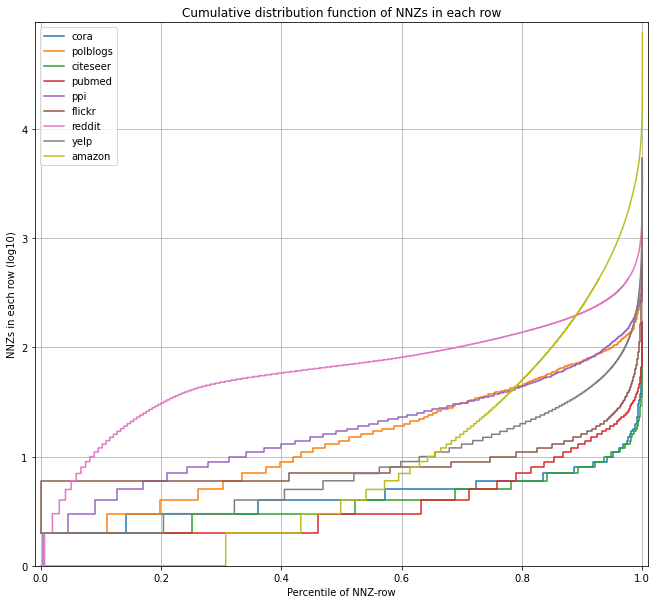

In [37]:
fig = plt.gcf()
fig.set_size_inches(11,10)


cora_mn, cora_mx, cora_x, cora_y = get_xy(cora)
print(cora_mn)
print(cora_mx)
print(cora_x[0])
print(cora_y[0])

polblogs_mn, polblogs_mx, polblogs_x, polblogs_y = get_xy(polblogs)
citeseer_mn, citeseer_mx, citeseer_x, citeseer_y = get_xy(citeseer)
pubmed_mn, pubmed_mx, pubmed_x, pubmed_y = get_xy(pubmed)
ppi_mn, ppi_mx, ppi_x, ppi_y = get_xy(ppi)
flickr_mn, flickr_mx, flickr_x, flickr_y = get_xy(flickr)
reddit_mn, reddit_mx, reddit_x, reddit_y = get_xy(reddit)
yelp_mn, yelp_mx, yelp_x, yelp_y = get_xy(yelp)
amazon_mn, amazon_mx, amazon_x, amazon_y = get_xy(amazon)
mn = min([cora_mn,polblogs_mn,citeseer_mn,pubmed_mn,ppi_mn,flickr_mn,reddit_mn,yelp_mn,amazon_mn])
mx = max([cora_mx,polblogs_mx,citeseer_mx,pubmed_mx,ppi_mx,flickr_mx,reddit_mx,yelp_mx,amazon_mx])


plt.step(cora_y, np.log10(cora_x), label='cora')
log.info(cora_mn)
log.info(cora_mx)

plt.step(polblogs_y, np.log10(polblogs_x), label='polblogs')
log.info(polblogs_mn)
log.info(polblogs_mx)

plt.step(citeseer_y, np.log10(citeseer_x), label='citeseer')
log.info(citeseer_mn)
log.info(citeseer_mx)

plt.step(pubmed_y, np.log10(pubmed_x), label='pubmed')
log.info(pubmed_mn)
log.info(pubmed_mx)

plt.step(ppi_y, np.log10(ppi_x), label='ppi')
log.info(ppi_mn)
log.info(ppi_mx)

plt.step(flickr_y, np.log10(flickr_x), label='flickr')
log.info(flickr_mn)
log.info(flickr_mx)

plt.step(reddit_y, np.log10(reddit_x), label='reddit')
log.info(reddit_mn)
log.info(reddit_mx)

plt.step(yelp_y, np.log10(yelp_x), label='yelp')
log.info(yelp_mn)
log.info(yelp_mx)

plt.step(amazon_y, np.log10(amazon_x), label='amazon')
log.info(amazon_mn)
log.info(amazon_mx)

plt.title('Cumulative distribution function of NNZs in each row')

plt.ylabel('NNZs in each row (log10)')

plt.xlabel('Percentile of NNZ-row')

plt.legend(loc='best')

plt.xlim([-0.01,1.01])

plt.ylim([np.log10(1), np.log10(mx)+0.1])

plt.grid()

plt.show()

In [2]:
def pdf(x, mu=0, sigma=1):
    """
    Calculates the normal distribution's probability density
    function (PDF).
    """
    term1 = 1.0 / ( sqrt(2*np.pi) * sigma )
    term2 = np.exp( -0.5 * ( (x-mu)/sigma )**2 )
    return term1 * term2

In [7]:
data1 = np.random.normal(loc=0, scale=5.0, size=30)

data2 = np.random.normal(loc=2, scale=7.0, size=30)

data1.sort(), data2.sort()

min_val = floor(min(data1+data2))

max_val = ceil(max(data1+data2))
print(data1)
print(data1[[-1]])



[-8.92534118e+00 -8.19963890e+00 -8.28683070e-01 -6.80751132e-01
 -4.97177451e-01 -3.98420054e-01 -6.91358736e-02 -1.04759322e-02
  4.73489437e-01  1.00731089e+00  1.16272771e+00  1.26070324e+00
  1.74972787e+00  2.36095890e+00  2.37115175e+00  2.66760627e+00
  2.87291794e+00  2.92191993e+00  2.95087073e+00  3.43099192e+00
  3.75373885e+00  5.41390476e+00  5.98633079e+00  6.38810582e+00
  6.79945827e+00  7.41570584e+00  7.46921946e+00  8.80162915e+00
  8.96007221e+00  1.10332815e+01]
[11.03328146]


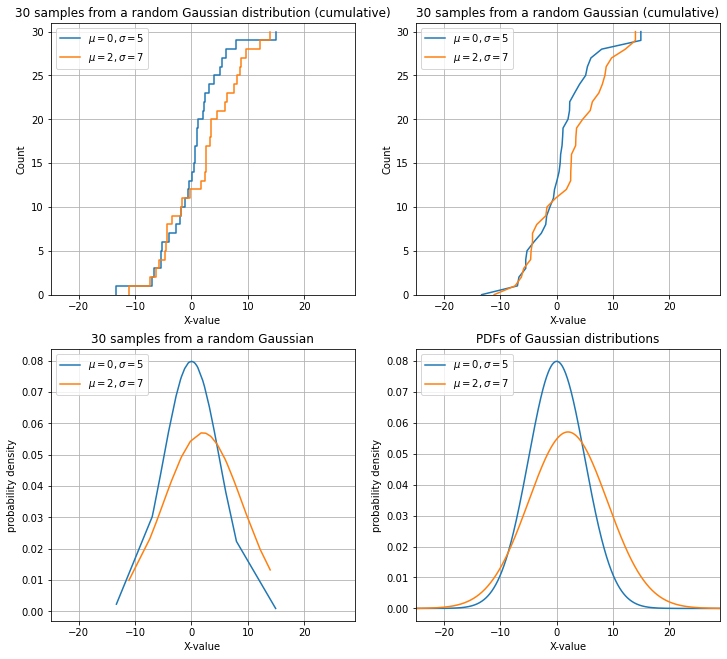

In [5]:
fig = plt.gcf()

fig.set_size_inches(12,11)

# Cumulative distributions, stepwise:

plt.subplot(2,2,1)

plt.step(np.concatenate([data1, data1[[-1]]]), np.arange(data1.size+1), label='$\mu=0, \sigma=5$')

plt.step(np.concatenate([data2, data2[[-1]]]), np.arange(data2.size+1), label='$\mu=2, \sigma=7$')

plt.title('30 samples from a random Gaussian distribution (cumulative)')

plt.ylabel('Count')

plt.xlabel('X-value')

plt.legend(loc='upper left')

plt.xlim([min_val, max_val])

plt.ylim([0, data1.size+1])

plt.grid()

# Cumulative distributions, smooth:

plt.subplot(2,2,2)

plt.plot(np.concatenate([data1, data1[[-1]]]), np.arange(data1.size+1), label='$\mu=0, \sigma=5$')

plt.plot(np.concatenate([data2, data2[[-1]]]), np.arange(data2.size+1), label='$\mu=2, \sigma=7$')

plt.title('30 samples from a random Gaussian (cumulative)')

plt.ylabel('Count')

plt.xlabel('X-value')

plt.legend(loc='upper left')

plt.xlim([min_val, max_val])

plt.ylim([0, data1.size+1])

plt.grid()

# Probability densities of the sample points function

plt.subplot(2,2,3)

pdf1 = pdf(data1, mu=0, sigma=5)

pdf2 = pdf(data2, mu=2, sigma=7)

plt.plot(data1, pdf1, label='$\mu=0, \sigma=5$')

plt.plot(data2, pdf2, label='$\mu=2, \sigma=7$')

plt.title('30 samples from a random Gaussian')

plt.legend(loc='upper left')

plt.xlabel('X-value')

plt.ylabel('probability density')

plt.xlim([min_val, max_val])

plt.grid()

# Probability density function

plt.subplot(2,2,4)

x = np.arange(min_val, max_val, 0.05)

pdf1 = pdf(x, mu=0, sigma=5)

pdf2 = pdf(x, mu=2, sigma=7)

plt.plot(x, pdf1, label='$\mu=0, \sigma=5$')

plt.plot(x, pdf2, label='$\mu=2, \sigma=7$')

plt.title('PDFs of Gaussian distributions')

plt.legend(loc='upper left')

plt.xlabel('X-value')

plt.ylabel('probability density')

plt.xlim([min_val, max_val])

plt.grid()

plt.show()